### import libraries 

In [65]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data read

In [4]:
df=pd.read_csv("purchase-analytics/purchase data.csv")

In [6]:
df.describe()

#each customer has row so the describtion is not useful 

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,5.869300e+04,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,...,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,2.000003e+08,349.431074,0.249399,0.844309,0.691973,0.840799,0.248070,1.392074,1.780999,2.006789,...,0.042799,0.117851,0.035865,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,1.443167e+02,212.045058,0.432669,1.633083,1.498734,1.631628,0.431897,0.091139,0.170868,0.046867,...,0.202405,0.322434,0.185954,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,2.000000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.260000,1.870000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,2.000001e+08,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.340000,1.580000,1.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,2.000003e+08,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.390000,1.880000,2.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,2.000004e+08,530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,1.890000,2.060000,...,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,2.000005e+08,730.000000,1.000000,5.000000,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


In [7]:
#there is no missing data
df.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Applying the segmentation model

In [13]:
#what has to be done? 

#1.standardize data 
#2. pca
#3. k means pca

### Import Segmentation Model

In [27]:
scaler=pickle.load(open('sacler.pickle','rb'))

In [29]:
pca =pickle.load(open('pca_pickle.pickle','rb'))

In [31]:
kmeans_pca = pickle.load(open('kmeans_pca_pickle.pickle','rb'))

### Standardization

In [32]:
df.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [34]:
features = df[[ 'Sex', 'Marital status', 'Age', 'Education', 'Income','Occupation', 'Settlement size']]

df_purchasae_segm_std=scaler.transform(features)

### PCA

In [35]:
df_purchase_segm_pca= pca.transform(df_purchasae_segm_std)

In [ ]:
#pca score

### K-MEANS PCA

In [36]:
purchase_segm_kmeans_pca= kmeans_pca.predict(df_purchase_segm_pca)

In [37]:
df_purchase_predictors = df.copy()

In [38]:
df_purchase_predictors['Segment']= purchase_segm_kmeans_pca

In [42]:
df_purchase_predictors.head(2)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


### Data analysis by Custoemr

In [41]:
df_purchase_predictors.head(2)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [43]:
#number of visit per ID

temp1= df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index= False).count()
temp1= temp1.set_index('ID')
temp1=temp1.rename(columns={'Incidence':'# of visit'})

In [44]:
temp1

,# of visit
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [47]:
#number of purchases per ID

temp2= df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index= False).sum()
temp2= temp2.set_index('ID')
temp2=temp2.rename(columns={'Incidence':'# of Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,# of visit,# of Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [50]:
#avg number of purchases 

temp3['Avg_N_purchases']= temp3['# of Purchases']/ temp3['# of visit']
temp3.head(2)

,# of visit,# of Purchases,Avg_N_purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437


In [55]:
# which segment customer is belongs to.  

temp4= df_purchase_predictors[['ID','Segment']].groupby(['ID'], as_index= False).mean()
temp4= temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [57]:
df_purchase_descr.head(3)

,# of visit,# of Purchases,Avg_N_purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0


In [58]:
###there are over 500 individuals, still too big number to analyse. let's analyse behaviours per segment

### Segment Proportions 

In [71]:
segm_prop= df_purchase_descr[['# of Purchases','Segment']].groupby(['Segment']).count()/ df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns={'# of Purchases':'Segment proportion'})
segm_prop.head()

,Segment proportion
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


In [79]:
segm_prop

,Segment proportion
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


Text(0.5, 1.0, 'Segment Proportions')

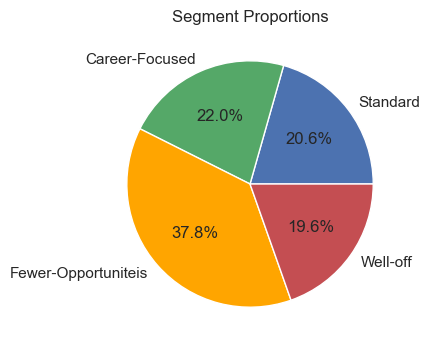

In [87]:
plt.figure(figsize=(8,4))
# label=['Standard, Career-Focused','Fewer-Opportuniteis','Well-off']
plt.pie(segm_prop['Segment proportion'],
        labels=['Standard', 'Career-Focused','Fewer-Opportuniteis','Well-off'],
       autopct ='%1.1f%%',
       colors=('b','g','orange','r'))
plt.title('Segment Proportions')


### Purchase Occasion and Purchase Incidence 

mean= average behaviour
std = how homogenous each segmentation is 

In [89]:
segment_mean = df_purchase_descr.groupby(['Segment']).mean()
segment_mean

,# of visit,# of Purchases,Avg_N_purchases
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,113.730159,22.756614,0.201588
3.0,117.295918,34.602041,0.284478


In [90]:
segment_std =df_purchase_descr.groupby(['Segment']).std()
segment_std

,# of visit,# of Purchases,Avg_N_purchases
Segment,,,
0.0,19.039605,16.774464,0.126603
1.0,44.864656,53.744530,0.200056
2.0,16.410498,13.815040,0.120335
3.0,20.716152,25.900579,0.171787


Text(0.5, 1.0, 'Avg number of store visits by Segment')

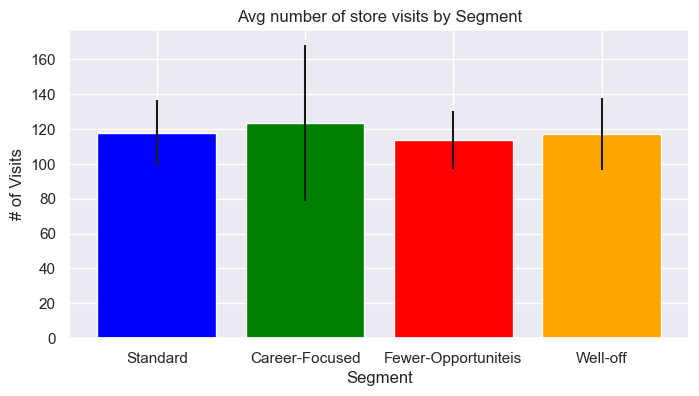

In [97]:
# bar chart 

plt.figure(figsize=(8,4))
plt.bar(x=(0,1,2,3),
        tick_label = ('Standard', 'Career-Focused','Fewer-Opportuniteis','Well-off'),
        height = segment_mean['# of visit'],
        yerr=segment_std['# of visit'],
        color=('blue','green','red','orange'))
plt.xlabel('Segment')
plt.ylabel('# of Visits')
plt.title('Avg number of store visits by Segment')

explanation:height = mean
verticla line = std, how big the std is 
fewer opportunities visit the store the store least 
career-focused visits the most, however the std is high - customer in this segment are homogenous,
so they are least alike when they visit the store. 

### How often do they buy a product? 

Text(0.5, 1.0, '# number of Purchases by Segment')

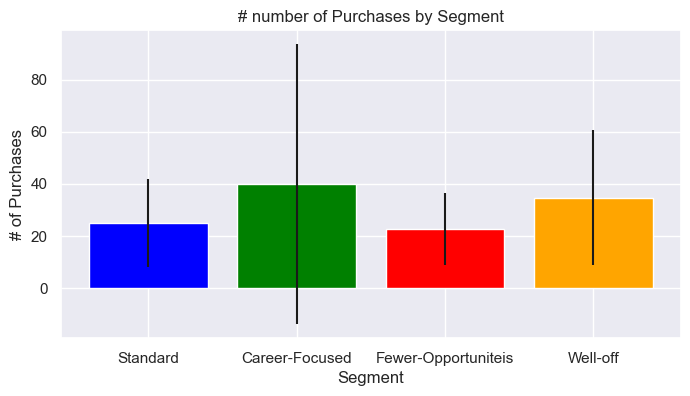

In [101]:
# bar chart 

plt.figure(figsize=(8,4))
plt.bar(x=(0,1,2,3),
        tick_label = ('Standard', 'Career-Focused','Fewer-Opportuniteis','Well-off'),
        height = segment_mean['# of Purchases'],
        yerr=segment_std['# of Purchases'],
        color=('blue','green','red','orange'))
plt.xlabel('Segment')
plt.ylabel('# of Purchases')
plt.title('# number of Purchases by Segment')

explanation: Career-Focused group buys products frequently however, however the std is big. It means that some of them buy products frequently but the other part less. 
The most homogenous segment is "fewer opportuniteis" their purchasing behaviour is similar and as well as the frequency of purchasing. 

### Avg number of purchaes

Text(0.5, 1.0, 'Avg number of Purchases by Segment')

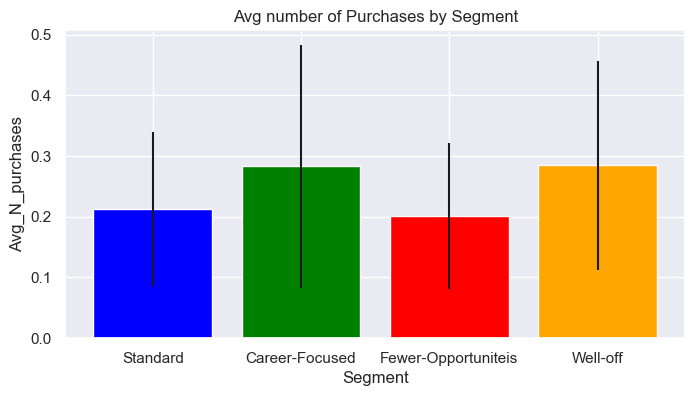

In [100]:
# bar chart 

plt.figure(figsize=(8,4))
plt.bar(x=(0,1,2,3),
        tick_label = ('Standard', 'Career-Focused','Fewer-Opportuniteis','Well-off'),
        height = segment_mean['Avg_N_purchases'],
        yerr=segment_std['Avg_N_purchases'],
        color=('blue','green','red','orange'))
plt.xlabel('Segment')
plt.ylabel('Avg_N_purchases')
plt.title('Avg number of Purchases by Segment')

Explanation: Carrer Focused gorup and well-off group both have similar average number of purchase, however
the std is high, it means that their buying behaviour in the group can differ a lot. (e.g. some of them buy more frequently than the others) 

and
few-opportuniteis gorup has the lowest average number of purchases. 


### Brand Choice 

In [102]:
#purchase only 
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [146]:
df_purchase_incidence.head(3)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.9,1.99,...,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.9,1.91,...,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.9,1.99,...,1,0,0,0,47,1,110866,1,0,2


In [111]:
#make dummy variable based on the purchase of which brand 
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix='Brand',prefix_sep='_')

#which brand was purchased, and who purchased it (ID), which segment the customer was in (Segment)
brand_dummies['Segment'],brand_dummies['ID'] =  df_purchase_predictors['Segment'], df_purchase_predictors['ID']

In [114]:
brand_dummies.head(4)

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001


In [115]:
#group by based on the person
temp= brand_dummies.groupby(['ID'], as_index=True).mean()

In [149]:
#but still therea are too many rows (individual)
temp.head(2)

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.0,0.222222,0.222222,2.0
200000002,0.000000,0.090909,0.0,0.909091,0.000000,3.0


In [117]:
#group by per segment 
mean_brand_choice = temp.groupby(['Segment'],as_index=True).mean()

In [150]:
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0.0,0.251186,0.396502,0.156481,0.059474,0.136357
1.0,0.072871,0.146808,0.039976,0.112395,0.627951
2.0,0.137567,0.681190,0.020923,0.061548,0.098772
3.0,0.041928,0.117422,0.030610,0.613623,0.196417


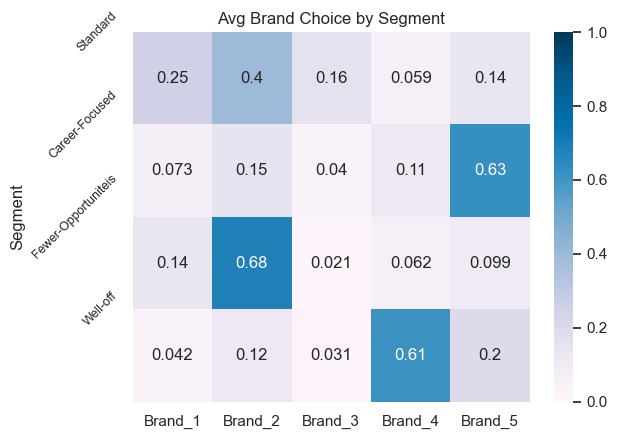

In [118]:
#show the correlation between segments and their brand choices

sns.heatmap(mean_brand_choice,
           vmin=0,
           vmax=1,
           cmap='PuBu',
           annot=True)
plt.yticks([0,1,2,3],['Standard', 'Career-Focused','Fewer-Opportuniteis','Well-off'],rotation=45,fontsize=9)
plt.title('Avg Brand Choice by Segment')
plt.show()

#brand1(cheaper ) - brand5(expensive)

### Revenue for each brand and in total by segment

In [152]:
#calculate the revenue for brand1
temp= df_purchase_predictors[df_purchase_predictors['Brand']==1]

In [184]:
temp= df_purchase_predictors[df_purchase_predictors['Brand']==1]
temp.loc[:,'Revenue Brand 1']=temp['Price_1'] *temp['Quantity']
segments_brand_revenue=pd.DataFrame()
segments_brand_revenue[['Segment','Revenue Brand 1']]=temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index=False).sum()


/var/folders/zp/gzkfvl7n6zdb67cr9rb36tkh0000gn/T/ipykernel_19058/1590463664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 1']=temp['Price_1'] *temp['Quantity']


In [185]:
temp= df_purchase_predictors[df_purchase_predictors['Brand']==2]
temp.loc[:,'Revenue Brand 2']=temp['Price_2'] *temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 2']]=temp[['Segment','Revenue Brand 2']].groupby(['Segment'],as_index=False).sum()



/var/folders/zp/gzkfvl7n6zdb67cr9rb36tkh0000gn/T/ipykernel_19058/1404304390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 2']=temp['Price_2'] *temp['Quantity']


In [186]:
temp= df_purchase_predictors[df_purchase_predictors['Brand']==3]
temp.loc[:,'Revenue Brand 3']=temp['Price_3'] *temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']]=temp[['Segment','Revenue Brand 3']].groupby(['Segment'],as_index=False).sum()



/var/folders/zp/gzkfvl7n6zdb67cr9rb36tkh0000gn/T/ipykernel_19058/3746051742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 3']=temp['Price_3'] *temp['Quantity']


In [187]:
temp= df_purchase_predictors[df_purchase_predictors['Brand']==4]
temp.loc[:,'Revenue Brand 4']=temp['Price_4'] *temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']]=temp[['Segment','Revenue Brand 4']].groupby(['Segment'],as_index=False).sum()



/var/folders/zp/gzkfvl7n6zdb67cr9rb36tkh0000gn/T/ipykernel_19058/3124992464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 4']=temp['Price_4'] *temp['Quantity']


In [188]:
temp= df_purchase_predictors[df_purchase_predictors['Brand']==5]
temp.loc[:,'Revenue Brand 5']=temp['Price_5'] *temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']]=temp[['Segment','Revenue Brand 5']].groupby(['Segment'],as_index=False).sum()



/var/folders/zp/gzkfvl7n6zdb67cr9rb36tkh0000gn/T/ipykernel_19058/3222310783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 5']=temp['Price_5'] *temp['Quantity']


In [189]:
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2611.19,4768.52,3909.17,861.38,2439.75
1,1,736.09,1746.42,664.75,2363.84,19441.06
2,2,2258.90,13955.14,716.25,1629.31,2230.50
3,3,699.47,1298.23,731.35,14185.57,5509.69


In [190]:
segments_brand_revenue['Total_Revenue']= (segments_brand_revenue['Revenue Brand 1']+
                                          segments_brand_revenue['Revenue Brand 2']+
                                          segments_brand_revenue['Revenue Brand 3']+
                                          segments_brand_revenue['Revenue Brand 4']+
                                          segments_brand_revenue['Revenue Brand 5'])

In [191]:
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total_Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [194]:
segments_brand_revenue['Segment_Proportions']=segm_prop['Segment proportion']
segments_brand_revenue['Segment']=segments_brand_revenue['Segment'].map(
                                                                        {0:'Standard',
                                                                         1:'Career-Focused',
                                                                         2:'Fewer-Opportuniteis',
                                                                         3:'Well-off'})

In [197]:
# segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total_Revenue,Segment_Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportuniteis,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


In [ ]:
#marketing strategy 

Brand3 coud lower the price to attract standard segment 

Brand5- Career focused group likes to buy the most expensive candy bar- they can target advertisment for the career focused group 
and could cuutiously increase the price 

brand4 -well-off exclusively buys brand4 prdoucts - Brand4 could cautiously increase the price